In [1]:
import numpy as np
import csv

# Parameters for the sphere and cylinder
R1 = 1  # Sphere radius
R2 = 1  # Cylinder radius

# Create a grid of points
points = []
results = []

# Generate points in the range
for x in np.linspace(-1.5, 1.5, 10):  # Adjust number of points as needed
    for y in np.linspace(-1.5, 1.5, 10):
        for z in np.linspace(-1.5, 1.5, 10):
            # Calculate the implicit function value
            value = max(x**2 + y**2 + z**2 - R1**2, z**2 - R2**2)
            points.append((x, y, z))
            results.append(value)

# Save to CSV
with open('implicit_function_values.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["x", "y", "z", "f(x, y, z)"])  # Header
    for (x, y, z), f_value in zip(points, results):
        writer.writerow([f"{x:.3f}", f"{y:.3f}", f"{z:.3f}", f"{f_value:.3f}"])

print("Data has been written to 'implicit_function_values.csv'.")


Data has been written to 'implicit_function_values.csv'.


In [2]:
!pip install k3d


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.8 MB/s eta 0:00:00


In [4]:
import numpy as np
import k3d

# Define parameters
R1 = 1  # Sphere radius
R2 = 1  # Cylinder radius

# Create a grid of points
x = np.linspace(-1.5, 1.5, 30)
y = np.linspace(-1.5, 1.5, 30)
z = np.linspace(-1.5, 1.5, 30)

# Create meshgrid
X, Y, Z = np.meshgrid(x, y, z)

# Calculate the implicit function
F = np.maximum(X**2 + Y**2 + Z**2 - R1**2, Z**2 - R2**2)

# Create a K3D plot
plot = k3d.plot()

# Create a boolean array for the isosurface (where the function is close to 0)
iso_surface = np.abs(F) < 0.05  # Adjust the threshold as needed

# Add the voxels to the plot
voxels = k3d.voxels(iso_surface, color=0xFF0000, alpha=0.5)
plot += voxels

# Display the plot
plot.display()


/usr/local/lib/python3.10/dist-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "bool" does not match required type "uint8". A coerced copy has been created.
  warnings.warn(


Output()

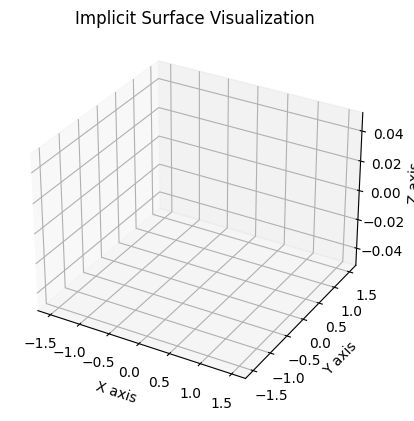

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define parameters
R1 = 1  # Sphere radius
R2 = 1  # Cylinder radius

# Create a grid of points
x = np.linspace(-1.5, 1.5, 30)
y = np.linspace(-1.5, 1.5, 30)
z = np.linspace(-1.5, 1.5, 30)

# Create meshgrid
X, Y, Z = np.meshgrid(x, y, z)

# Calculate the implicit function
F = np.maximum(X**2 + Y**2 + Z**2 - R1**2, Z**2 - R2**2)

# Create a figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the isosurface where F is close to 0
ax.contourf(X[:, :, 0], Y[:, :, 0], F[:, :, 0], levels=[-0.05, 0.05], alpha=0.5, cmap='viridis')

# Set labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Implicit Surface Visualization')

# Show the plot
plt.show()


In [6]:
import csv

# Function to read the .obj file and extract vertex coordinates
def extract_coordinates_from_obj(file_path):
    coordinates = []
    with open(file_path, 'r') as obj_file:
        for line in obj_file:
            if line.startswith('v '):
                # Split and extract the coordinates
                parts = line.split()
                x = float(parts[1])
                y = float(parts[2])
                z = float(parts[3])
                coordinates.append((x, y, z))
    return coordinates

# Path to your .obj file
obj_file_path = 'baby.obj'  # Change this to your file path

# Extract coordinates
coordinates = extract_coordinates_from_obj(obj_file_path)

# Count the number of coordinates
count = len(coordinates)
print(f"Number of coordinates: {count}")

# Write to CSV
csv_filename = 'coordinates.csv'
with open(csv_filename, mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['x', 'y', 'z'])  # Write header
    writer.writerows(coordinates)  # Write data

print(f"Coordinates saved to {csv_filename}")


Number of coordinates: 41094
Coordinates saved to coordinates.csv


In [7]:
import csv
import math

# Function to read the .obj file and extract vertex coordinates
def extract_coordinates_from_obj(file_path):
    coordinates = []
    with open(file_path, 'r') as obj_file:
        for line in obj_file:
            if line.startswith('v '):
                parts = line.split()
                x = float(parts[1])
                y = float(parts[2])
                z = float(parts[3])
                coordinates.append((x, y, z))
    return coordinates

# Path to your .obj file
obj_file_path = 'baby.obj'  # Change this to your file path

# Extract coordinates
coordinates = extract_coordinates_from_obj(obj_file_path)

# Count the number of coordinates
count = len(coordinates)
print(f"Number of coordinates: {count}")

# Calculate max x, y, z
max_x = max(coord[0] for coord in coordinates)
max_y = max(coord[1] for coord in coordinates)
max_z = max(coord[2] for coord in coordinates)

print(f"Max Coordinates: x={max_x}, y={max_y}, z={max_z}")

# Calculate the optimized radius r
r = math.sqrt(max_x**2 + max_y**2 + max_z**2)
print(f"Optimized radius (r): {r}")

# Create a Maxima-compatible expression for the sphere
maxima_sphere = f"{max_x}^2 + {max_y}^2 + {max_z}^2 = {r}^2"

# Print the Maxima syntax
print(f"Maxima Syntax: {maxima_sphere}")

# Write the max coordinates and Maxima syntax to CSV
csv_filename = 'max_coordinates_and_sphere.csv'
with open(csv_filename, mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Max x', 'Max y', 'Max z', 'Optimized r', 'Maxima Sphere Syntax'])  # Write header
    writer.writerow([max_x, max_y, max_z, r, maxima_sphere])  # Write data

print(f"Max coordinates and sphere syntax saved to {csv_filename}")


Number of coordinates: 41094
Max Coordinates: x=65.1333, y=157.0, z=-120.157
Optimized radius (r): 208.1563148643106
Maxima Syntax: 65.1333^2 + 157.0^2 + -120.157^2 = 208.1563148643106^2
Max coordinates and sphere syntax saved to max_coordinates_and_sphere.csv


In [8]:
import csv

# Function to read the .obj file and extract vertex coordinates
def extract_coordinates_from_obj(file_path):
    coordinates = []
    with open(file_path, 'r') as obj_file:
        for line in obj_file:
            if line.startswith('v '):
                parts = line.split()
                x = float(parts[1])
                y = float(parts[2])
                z = float(parts[3])
                coordinates.append((x, y, z))
    return coordinates

# Path to your .obj file
obj_file_path = 'baby.obj'  # Change this to your file path

# Extract coordinates
coordinates = extract_coordinates_from_obj(obj_file_path)

# Count the number of coordinates
count = len(coordinates)
print(f"Number of coordinates: {count}")

# Calculate max x, y, z
max_x = max(coord[0] for coord in coordinates)
max_y = max(coord[1] for coord in coordinates)
max_z = max(coord[2] for coord in coordinates)

print(f"Max Coordinates: x={max_x}, y={max_y}, z={max_z}")

# Define a small radius R (you can adjust this value)
R = 0.01  # Small value for the radius

# Create the sphere equation
sphere_equation = f"(x - {max_x})^2 + (y - {max_y})^2 + (z - {max_z})^2 = {R**2}"

# Print the sphere equation
print(f"Sphere Equation: {sphere_equation}")

# Write the max coordinates and sphere equation to CSV
csv_filename = 'sphere_combination.csv'
with open(csv_filename, mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Max x', 'Max y', 'Max z', 'Radius R', 'Sphere Equation'])  # Write header
    writer.writerow([max_x, max_y, max_z, R, sphere_equation])  # Write data

print(f"Max coordinates and sphere equation saved to {csv_filename}")


Number of coordinates: 41094
Max Coordinates: x=65.1333, y=157.0, z=-120.157
Sphere Equation: (x - 65.1333)^2 + (y - 157.0)^2 + (z - -120.157)^2 = 0.0001
Max coordinates and sphere equation saved to sphere_combination.csv
